In [ ]:
#Submitted by Mehul Awasthi and Yash Chandra

# Task 3
The tweets are collected using two libraries, namely twitteR and rtweets. The R scripts for collecting tweets using these libraries are stored in the files rtweets.R and twitteR.R respectively. The script 'combine_files.R' helps combine the files containing data collected using the rtweets library. This script creates a file called 'tweets_finalfinal.csv'. Tweets were searched containing the keyword '#influenza' or '#flu'.

In the program below, the abbreviations of each state are stored in a vector called 'x'. The idea behind this is that, in the location data of the tweets, many of them have the location stored as 'city, state abbreviation' (for eg: Los Angeles,CA). This makes it easier to filter and pick the data we want to plot. In case a location is stored as 'CANADA' that will also be picked up. However, we perform a second stage of filtering where only the last two characters of the location are extracted and again checked with the help of the vector x, thereby preventing non-American locations from being picked up. There is a drawback to this strategy as a lot of tweets with the location data stored as anything other than in this format are omitted. However for this particular task and project, this seems appropriate.

Next, three files are read into dataframes. These are files collected as a result of the twitteR library. So in order to get the location data from this a number of steps have to be performed (such as lookupUsers).
Finally the data is combined into a final dataframe where only the state abbreviations and their frequency are stored and plotted using plot_usmap.

Between rtweets and twitteR, rtweets seems like a better library due to the fact that you can actually choose from which particular location you want the tweets from, thereby making the whole process easier.

[1] "Using direct authentication"


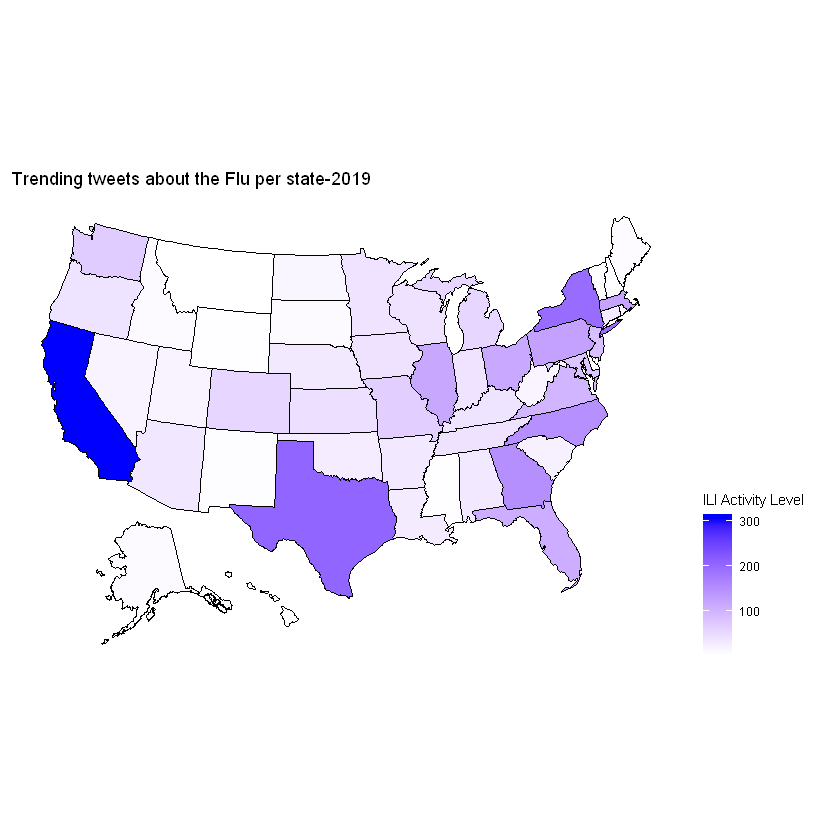

In [3]:
#References
#https://cran.r-project.org/web/packages/usmap/vignettes/mapping.html
library(ggplot2)
library(dplyr)
library(stringr)
library(usmap)
library(twitteR)


consumer_key <- "XXXXXXXX"
consumer_secret <- "XXXXXXXX"
access_token <- "XXXXXXXX"
access_secret <- "XXXXXXXX"

setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

x <- c("NY", "MI", "IN","AL","AK", "AZ","AR","CA","CO","CT"
       ,"DE","FL","GA","HI","ID","IL","IA","KS","KY","LA","ME","MD","MA","MN",
       "MS","MO","MT","NE","NV","NH","NJ","NM","NC","ND","OH","OK","OR","PA","RI","SC",
       "SD","TN","TX","UT","VT","VA","WA","WV","WI","WY")


my_text <- read.csv("tweets_finalfinal.csv")
locs <- grepl(paste(x, collapse = "|"), my_text$location)


final_locs <- data.frame(states = as.character(my_text$location[locs]))


f1 <- read.csv("tweets2.csv")
df1 <- data.frame(f1)
screeny <- lookupUsers(as.character(df1$screenName)) 
df2 <- twListToDF(screeny)  
#df2 <- data.frame()
#users <- !is.na(df2$location)
#df2 <- df2[users]
df2 <-df2[!duplicated(df2$description),]
df_twitteR <- data.frame(states = df2$location)

f1 <- read.csv("tweets3.csv")
df1 <- data.frame(f1)
screeny <- lookupUsers(as.character(df1$screenName)) 
df2 <- twListToDF(screeny)  
#users <- !is.na(df2$location)
#df2 <- df2$location[users]
df2 <-df2[!duplicated(df2$description),]
df3 <- data.frame(states = df2$location)
#df3 <-df3[!duplicated(df3$description),]
df_twitteR <- rbind(df_twitteR,df3)


f1 <- read.csv("tweets4.csv")
df1 <- data.frame(f1)
screeny <- lookupUsers(as.character(df1$screenName)) 
df2 <- twListToDF(screeny)
#users <- !is.na(df2$location)
#df2 <- df2$location[users]
df2 <-df2[!duplicated(df2$description),]
df3 <- data.frame(states = df2$location)
#df3 <-df3[!duplicated(df3$text),]
df_twitteR <- rbind(df_twitteR,df3)

final_locs <- rbind(final_locs,df_twitteR)
s <- as.character(substr(final_locs$states,nchar(as.character(final_locs$states))-1,nchar(as.character(final_locs$states))))
final_locs$region <- s
locs <- grepl(paste(x, collapse = "|"), final_locs$region)
f_locs <- data.frame(state = as.character(final_locs$region[locs]))
freq = data.frame(count(f_locs,state))

plot_usmap(data = freq, values = "n", lines = "black") + 
  scale_fill_continuous( low = "white", high = "blue",name = "ILI Activity Level") + 
  theme(legend.position = "right") + ggtitle("Trending tweets about the Flu per state-2019")



#freq = data.frame(count(final_locs,region))


## Comparison of CDC heatmap and Tweets heatmap
The flu activity per state as per the CDC heatmap seems different from the Tweets heatmap. One of the main conclusions we can draw from this is that there is no such direct correlation between the number of tweets per state and the actual level of flu activity in that state. Look at California in both maps for example. The number of tweets from California is the highest but that does not correlate to the activity level of the flu in the CDC map!

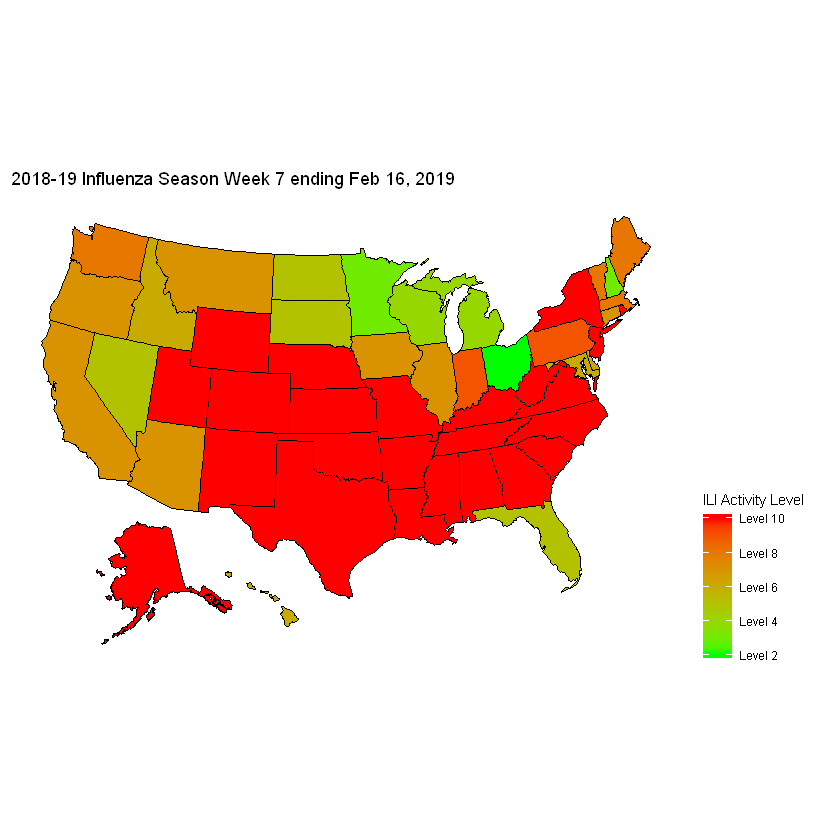

In [3]:
#References
#https://cran.r-project.org/web/packages/usmap/vignettes/mapping.html
#For side by side comparison

library(usmap)
library(ggplot2)

 
#Read the CSV file
f1 <- read.csv("StateDataforMap_2018-19week7.csv")
f1$level_number <- gsub("[^0-9.]", "", f1$ACTIVITY.LEVEL )

leg <- c('Level 2','Level 4','Level 6','Level 8','Level 10')
activity <- data.frame(state = f1$STATENAME,levels = as.numeric(f1$level_number))
plot_usmap(data = activity, values = "levels", lines = "black") + 
  scale_fill_continuous( low = "green", high = "red",name = "ILI Activity Level", label = leg) + 
  theme(legend.position = "right") + ggtitle("2018-19 Influenza Season Week 7 ending Feb 16, 2019")



# Shiny App Implementation
Link to the app-
https://yashmehuldic.shinyapps.io/shiny

The scripts are stored in the folder 'App' (script names- server.R and ui.R) along with the .PNG files.